In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import joblib


In [12]:
data_set = pd.read_csv("20.csv")
data_set.shape

(2547574, 28)

In [3]:
data_set.head(5)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2020-01-01,WN,5888,ONT,SFO,1851.0,41.0,44.0,1935.0,2049.0,...,0.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,WN,6276,ONT,SFO,1146.0,-4.0,13.0,1159.0,1310.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,WN,4598,ONT,SJC,2016.0,-4.0,8.0,2024.0,2121.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01,WN,4761,ONT,SJC,1350.0,10.0,10.0,1400.0,1503.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01,WN,5162,ONT,SJC,916.0,1.0,6.0,922.0,1019.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_set.duplicated().sum()

0

In [5]:
data_set.size
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2547574 entries, 0 to 2547573
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         float64
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         float64
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    float64
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [7]:
data_set.isnull().sum()

ORIGIN          0
DEST            0
CRS_DEP_TIME    0
DEP_TIME        0
DEP_DELAY       0
TAXI_OUT        0
WHEELS_OFF      0
WHEELS_ON       0
TAXI_IN         0
CRS_ARR_TIME    0
ARR_TIME        0
ARR_DELAY       0
dtype: int64

In [13]:
data_set=data_set.drop(['CANCELLED','CANCELLATION_CODE','DIVERTED','CRS_ELAPSED_TIME','ACTUAL_ELAPSED_TIME','AIR_TIME','DISTANCE','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','Unnamed: 27','OP_CARRIER','OP_CARRIER_FL_NUM','FL_DATE'],axis=1)

In [14]:
mean_arrival_time = data_set['ARR_TIME'].mean()
data_set['ARR_TIME'].fillna(mean_arrival_time, inplace=True)
mean_arrival_timei = data_set['WHEELS_ON'].mean()
data_set['WHEELS_ON'].fillna(mean_arrival_timei, inplace=True)
#data_set.fillna(data_set.mean(), inplace=True)


In [15]:
le = LabelEncoder()
data_set['ORIGIN'] = le.fit_transform(data_set['ORIGIN'])
data_set['DEST'] = le.fit_transform(data_set['DEST'])
data_set.head(5)

,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY
0,247,310,1851.0,41.0,44.0,1935.0,2049.0,4.0,2053.0,68.0,74.0,363.0
1,247,310,1146.0,-4.0,13.0,1159.0,1310.0,8.0,1318.0,-2.0,71.0,363.0
2,247,317,2016.0,-4.0,8.0,2024.0,2121.0,3.0,2124.0,-6.0,57.0,333.0
3,247,317,1350.0,10.0,10.0,1400.0,1503.0,2.0,1505.0,10.0,63.0,333.0
4,247,317,916.0,1.0,6.0,922.0,1019.0,4.0,1023.0,-12.0,57.0,333.0


In [16]:
data_set.shape

(2547574, 12)

Top features for target 1: ['ARR_DELAY', 'ARR_TIME', 'ORIGIN', 'DEST', 'WHEELS_ON']


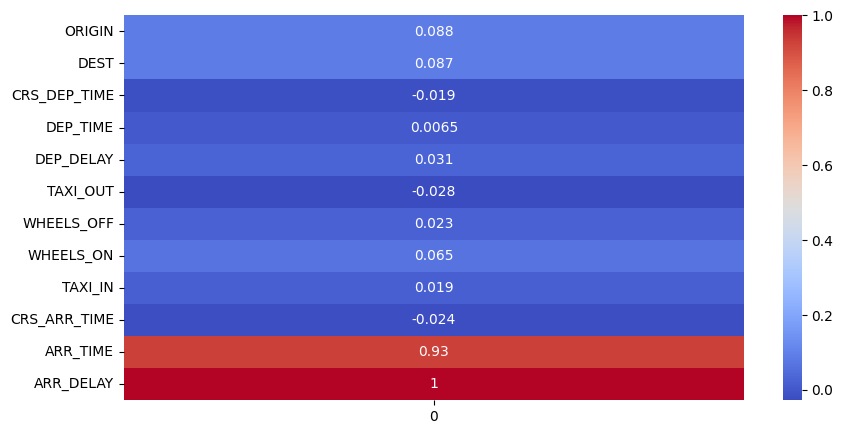

In [17]:
corr_matrix_target1 = data_set.corrwith(data_set['ARR_DELAY'], numeric_only=True)
fig, ax = plt.subplots(figsize=(10,5))
sb.heatmap(corr_matrix_target1.to_frame(), annot=True, cmap='coolwarm', ax=ax)
top_n_features_target1 = corr_matrix_target1.abs().sort_values(ascending=False).head().index.tolist()
print(f"Top features for target 1: {top_n_features_target1}")

In [18]:

features = ['ARR_TIME', 'ORIGIN', 'DEST','WHEELS_ON']
target = ['ARR_DELAY']
X_train, X_test, y_train, y_test = train_test_split(data_set[features], data_set[target], test_size=0.2, random_state=48)


In [19]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

y_predi = model.predict(X_train)
msei = mean_squared_error(y_train, y_predi)
r2i = r2_score(y_train, y_predi)
adj_r2i = 1 - (1 - r2i) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1))


print("Testing Performance Metrics:\n")
print(f"MSE: {mse}")
print(f"R2 score: {r2}")
print(f"Adjusted R2 score: {adj_r2}")
print("\nTraining Performance Metrics:\n")
print(f"MSE: {msei}")
print(f"R2 score: {r2i}")
print(f"Adjusted R2 score: {adj_r2i}") 

Testing Performance Metrics:

MSE: 36663.46475307232
R2 score: 0.8847340926974491
Adjusted R2 score: 0.8847331877816884

Training Performance Metrics:

MSE: 37076.880952845415
R2 score: 0.883695748160966
Adjusted R2 score: 0.8836955198956662


In [24]:
 #Print the first 5 actual and predicted arrival delay values
mae = mean_absolute_error(y_test, y_pred)
print("MAE for testing is :",mae)    
maei = mean_absolute_error(y_train, y_predi)
print("MAE for training is :",maei)
print("Actual ARR_DELAY:")
print(y_test[:10])
print("\nPredicted ARR_DELAY:")
print(y_pred[:10])


MAE for testing is : 102.49340785551225
MAE for training is : 102.9762447771692
Actual ARR_DELAY:
         ARR_DELAY
741789       651.0
1780393      512.0
1443745      700.0
1428762      118.0
57801       1744.0
17788        214.0
1235605      843.0
111718       898.0
2047100     2422.0
1859512      331.0

Predicted ARR_DELAY:
[ 656.88181411  438.85306191  830.2366482   127.92248789 1701.75798444
  242.49441671  876.26060663  810.66055171 2435.66835011  318.60855784]


In [25]:
import os
import pickle
pickle.dump(model,open('/home/ashik/Suyati/model_save','wb'))